In [1]:
import statistics
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
sns.set()
%matplotlib inline

# <font color = 'red'>Chapter 1: Exploratory Data Analysis </font>

## 1.1 Elements of Structured Data

| Term  | Synonyms  | Definition  |
|:-|:-:|:-|
|**Continuous**   |interval, float, numeric   |Data that can take on any value in an interval   |
|**Discrete**   |integer, count   |Data that can take on only integer values, such as counts.   |
|**Categorical**   |enums, enumerated, factors, nominal, polychotomous   |Data that can take on only a specific set of values representing a set of possible categories.   |
|**Binary**   |dichotomous, logical, indicator, boolean   |A special case of categorical data with just two categories of values (0/1, true/false).   |
|**Ordinal**   |ordered factor   |Categorical data that has an explicit ordering.   |

## 1.2 Rectangular Data

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-53v8{border-color:inherit;font-family:"Times New Roman", Times, serif !important;font-weight:bold;text-align:left;
  vertical-align:top}
.tg .tg-kftf{border-color:#fe0000;font-family:"Lucida Sans Unicode", "Lucida Grande", sans-serif !important;font-weight:bold;
  text-align:center;vertical-align:top}
.tg .tg-iucd{border-color:inherit;font-family:"Times New Roman", Times, serif !important;text-align:left;vertical-align:top}
.tg .tg-76x8{border-color:inherit;font-family:"Times New Roman", Times, serif !important;font-style:italic;text-align:left;
  vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-kftf">Key term</th>
    <th class="tg-kftf">Definition</th>
    <th class="tg-kftf">Synonyms</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-53v8">Data frame</td>
    <td class="tg-iucd">Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning model.</td>
    <td class="tg-iucd"></td>
  </tr>
  <tr>
    <td class="tg-53v8">Feature</td>
    <td class="tg-iucd">A column in the table is commonly referred to as a feature.</td>
    <td class="tg-76x8">attribute, input, predictor, variable</td>
  </tr>
  <tr>
    <td class="tg-53v8">Outcome</td>
    <td class="tg-iucd"></td>
    <td class="tg-76x8">dependent variable, response, target, output</td>
  </tr>
  <tr>
    <td class="tg-53v8">Records</td>
    <td class="tg-iucd">A row in the table is commonly referred to as a record.</td>
    <td class="tg-76x8">case, example, instance, observation, pattern, sample</td>
  </tr>
</tbody>
</table>

## 1.3 Estimate of location

### 1.3.1 Mean / Average

<div class="alert alert-block alert-info">
    <b><font color = #0015ff; size = 4> Mean / Average :</font></b> <hr>
The words “mean” and <b>“average”</b> are often used interchangeably. The substitution of one word for the other is common practice. The technical term is <b>“arithmetic mean”</b> and <b>“average”</b> is technically a center location. However, in practice among non-statisticians, <b>“average"</b> is commonly accepted for <b>“arithmetic mean”</b>.
</div>

#### 1.3.1.1 Sample Mean ($\bar{X}$)

The sample mean is the mean calculated from a group of random variables, drawn from the population. It is regarded as an efficient and unbiased estimator of population mean which means that the most expected value for the sample statistic is the population statistic, irrespective of the sampling error. The sample mean is calculated as under:

$$\bar X = \dfrac{\sum_{i=1}^{n} x_i}{n} \label{samplemean}$$

In [3]:
data = np.array([x for x in range(1,50)])

In [4]:
sum = 0

for i in data:
    sum += i
    
mean = sum/len(data)

In [5]:
mean

25.0

In [6]:
np.mean(data)

25.0

#### 1.3.1.2 Population Mean ($\mu$)

Population mean is defined as the average of the all the elements in the population. It is a mean of group characteristic, where group refers to elements of the population like items, persons, etc. and the characteristic is the item of interest. As the population is very large and not known, the population mean is unknown constant. With the help of the following formula, population mean can be calculated as under:

$$\displaystyle \mu=\frac{\sum_{i=1}^{N} x_i}{N} \nonumber$$

In [7]:
data = np.linspace(1,100, 1000)

In [8]:
np.mean(data)

50.50000000000001

#### 1.3.1.3 Trimmed Mean ( $\bar{X_T}$)

A variation of the mean is a trimmed mean, which you calculate by dropping a fixed number of sorted values at each end and then taking an average of the remaining values. The trimmed mean can be calculated as under:

$$\displaystyle \bar {X_T} = \frac{\sum_{i= p +1}^{n-p} x_i}{n-2p} \nonumber$$

In [9]:
data = [22, 25, 29, 11, 14, 18, 13, 13, 17, 11, 8, 8, 7, 12, 15, 6, 8, 7, 9, 12]

In [10]:
#calculate 10% trimmed mean
sp.stats.trim_mean(data, 0.1)

12.375

In [11]:
#calculate 30% trimmed mean
sp.stats.trim_mean(data, 0.3)

11.875

In [12]:
df = pd.DataFrame({'points': [25, 12, 15, 14, 19, 23, 25, 29],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})


#calculate 5% trimmed mean of points
sp.stats.trim_mean(df.points, 0.05) 

20.25

In [13]:
df = pd.DataFrame({'points': [25, 12, 15, 14, 19, 23, 25, 29],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})


#calculate 5% trimmed mean of 'points' and 'assists' columns
sp.stats.trim_mean(df[['points', 'assists']], 0.05)

array([20.25,  7.75])

#### 1.3.1.4 Weighted Mean ($\bar{x_w})$

The weighted mean is a type of average that takes into account the relative importance of each value in a dataset. It is calculated by multiplying each value by its corresponding weight, summing the products, and then dividing by the sum of the weights. The formula for calculating the weighted mean is:

$$\displaystyle \bar {X_w} = \frac{\sum_{i= 1}^{n} x_i w_i}{\sum_{i}^{n} w_i} \nonumber$$

In [14]:
values = np.random.rand(1,20).flatten()
weights = np.arange(20)

weighted_mean = np.average(values, weights=weights)

In [15]:
weighted_mean

0.3938243840846322

In [16]:
sumwx = 0
sumw = 0
for i,j in zip(values,weights):
    sumwx += (i*j)
    sumw += j

wmean = sumwx/sumw

In [17]:
wmean

0.3938243840846322

### 1.3.2 Median

In statistics, the median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. For a data set, it may be thought of as “the middle” value. The median is a measure of central tendency that is less sensitive to outliers than the mean. It is calculated by arranging all of the observations in a dataset from smallest to largest and then identifying the middle value. If there are an odd number of observations, the median is simply the middle value. If there are an even number of observations, the median is the average of the two middle values.

In [18]:
data = np.linspace(0,20,1000).flatten()

In [19]:
np.median(data)

10.0

In [20]:
data = np.linspace(0,21,1000).flatten()

In [21]:
np.median(data)

10.5

### 1.3.3 Percentiles / Quartiles

The values that divide a rank-ordered set of data into 100 equal parts are called percentiles. Percentiles are used to
compare and interpret data. For example, an observation at the 50th percentile would be greater than 50 percent of the other obeservations in the set. Quartiles divide data into quarters. The first quartile (Q1) is the 25th percentile,the second quartile (Q2 or median) is 50th percentile, and the third quartile (Q3) is the the 75th percentile. The interquartile range, or IQR, is the range of the middle 50 percent of the data values. The IQR is found by subtracting Q1 from Q3, and can help determine outliers by using the following two expressions.

* Q3 + IQR(1.5)
* Q1 – IQR(1.5)

In [22]:
data = np.linspace(1,120,1000).flatten()

In [23]:
np.percentile(data, 25)

30.75

In [24]:
np.percentile(data, 50)

60.5

In [25]:
np.percentile(data, 75)

90.25

In [26]:
np.quantile(data, 0.25)

30.75

In [27]:
np.quantile(data, 0.5)

60.5

In [28]:
np.quantile(data, 0.75)

90.25

### 1.3.4 Outliers

Outliers are extreme values that differ from most other data points in a dataset. They can have a big impact on your statistical analyses and skew the results of any hypothesis tests. It’s important to carefully identify potential outliers in your dataset and deal with them in an appropriate manner for accurate results. There are four ways to identify outliers: Sorting method, Data visualization method, Statistical tests (z scores), and Interquartile range method

## 1.4 Measures of Variability

### 1.4.1 Range $\left(R \right)$

The range $R$  of a data set is difference between its largest and smallest values

$$ R = x_{max} - x_{min}$$

In [29]:
data = np.random.rand(1,150).flatten()

In [30]:
np.max(data) - np.min(data)

0.9985498436505155

### 1.4.2 Mean Absolute Deviation

The mean absolute deviation (MAD) is a measure of variability that indicates the average distance between each data value and the mean. It can be used to quantify the spread in the data set and also be helpful in answering statistical questions in the real world1. The MAD of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.

$$\text{Mean Absolute Deviation (MAD)} = \frac{\sum_{i = 1}^{n} {|x_i - \bar{x}|}}{n} $$

In [31]:
data = np.random.randn(1,100).flatten()

In [32]:
mean = np.mean(data)

np.mean(np.abs(data - mean))

0.811478220469076

### 1.4.3 Median Absolute Deviation

The median absolute deviation (MAD) is a measure of variability that indicates the average distance between each data value and the median. It can be used to quantify the spread in the data set and also be helpful in answering statistical questions in the real world1. The MAD of a dataset is the median of the absolute deviations from the median.

In [33]:
data = np.random.randn(1,1000).flatten()

In [34]:
median = np.median(data)
mad = np.median(np.abs(data - median))

In [35]:
mad

0.6475852691466568

In [36]:
from statsmodels import robust

In [37]:
robust.mad(data)

0.9601113567083808

### 1.4.4 Variance 

#### 1.4.4.1 Sample Variance $\left(S^2\right)$

The sample variance is a measure of the spread of a dataset. It is calculated by taking the sum of the squared differences between each data point and the mean, and then dividing by the number of data points minus one. The formula for sample variance is:

$$s^2 = \dfrac{\sum (x_i-\bar x)^2}{n-1} \nonumber $$
$$s^2=\dfrac{\sum x_i^2 - \dfrac{1}{n}\left(\sum x_i\right)^2}{n-1} \nonumber$$

In [38]:
data = np.random.rand(1,20).flatten()

In [39]:
statistics.variance(data)

0.04754881581435322

In [40]:
np.var(data, ddof = 1)

0.04754881581435321

#### 1.4.4.2 Population variance $\left( \sigma^2 \right)$

Population variance is a measure of the spread of a dataset. It is calculated by taking the sum of the squared differences between each data point and the mean, and then dividing by the number of data points. The formula for population variance is:

$$\sigma^2 = \dfrac{\sum (x_i-\mu)^2}{N} \nonumber$$

In [41]:
data = np.random.rand(1,1000).flatten()

In [42]:
np.var(data)

0.08213635354367699

### 1.4.5 Standard deviation 

In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values1. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.

#### 1.4.5.1 sample standard deviation $\left( S \right)$

The sample standard deviation is a measure of the amount of variation or dispersion of a set of values in a sample. It is calculated by taking the square root of the sample variance. The sample variance is calculated by taking the average of the squared differences from the mean. The formula for sample standard deviation is:

$$s = \sqrt{s^2} = \sqrt{\dfrac{\sum (x-\bar x)^2}{n-1} } = \sqrt{\dfrac{\sum x^2 - \dfrac{1}{n}\left(\sum x\right)^2}{n-1}} \nonumber$$

In [43]:
statistics.stdev(data)

0.2867378107536444

#### 1.4.5.2 Population standard deviation ($ \sigma $)

The population standard deviation is a measure of the amount of variation or dispersion of a set of values in a population. It is calculated by taking the square root of the population variance. The population variance is calculated by taking the average of the squared differences from the mean. The formula for population standard deviation is:

$$\sigma =\sqrt{\dfrac{\sum (x−\mu)^2}{N}}$$

In [44]:
np.std(data)

0.28659440598810887

## 1.5 $Z$ - Scores

Another way to locate a particular observation x in a data set is to compute its distance from the mean in units of standard deviation. The  z -score indicates how many standard deviations an individual observation  x is from the center of the data set, its mean. It is used on distributions that have been standardized, which allows us to better understand its properties. If  z is negative then  x is below average. If  z is  0 then  x is equal to the average. If  z is positive then  x is above the average.

<div class="definition">
<p class="box-legend"><span>Definition: <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-134-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>z</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-733" style="width: 0.538em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.489em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.657em, 1000.49em, 2.388em, -999.998em); top: -2.237em; left: 0em;"><span class="mrow" id="MathJax-Span-734"><span class="mi" id="MathJax-Span-735" style="font-family: MathJax_Math-italic;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.242em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.049em; border-left: 0px solid; width: 0px; height: 0.576em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>z</mi></math></span></span><script type="math/tex" id="MathJax-Element-134">z</script>-score</span></p>

<p class="para  lt-stats-558" style="background-color: unset;"><em>The </em><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-135-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>z</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-736" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.481em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.649em, 1000.48em, 2.392em, -999.997em); top: -2.228em; left: 0em;"><span class="mrow" id="MathJax-Span-737"><span class="mi" id="MathJax-Span-738" style="font-family: MathJax_Math-italic;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.233em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.054em; border-left: 0px solid; width: 0px; height: 0.628em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>z</mi></math></span></span><script type="math/tex" id="MathJax-Element-135">z</script><em>-score</em> <em>of an observation</em> <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-136-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>x</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-739" style="width: 0.64em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.587em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.649em, 1000.53em, 2.392em, -999.997em); top: -2.228em; left: 0em;"><span class="mrow" id="MathJax-Span-740"><span class="mi" id="MathJax-Span-741" style="font-family: MathJax_Math-italic;">x</span></span><span style="display: inline-block; width: 0px; height: 2.233em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.054em; border-left: 0px solid; width: 0px; height: 0.628em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>x</mi></math></span></span><script type="math/tex" id="MathJax-Element-136">x</script> <em>is the number</em> <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-137-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>z</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-742" style="width: 0.534em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.481em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(1.649em, 1000.48em, 2.392em, -999.997em); top: -2.228em; left: 0em;"><span class="mrow" id="MathJax-Span-743"><span class="mi" id="MathJax-Span-744" style="font-family: MathJax_Math-italic;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.233em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.054em; border-left: 0px solid; width: 0px; height: 0.628em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>z</mi></math></span></span><script type="math/tex" id="MathJax-Element-137">z</script> <em>given by the computational formula</em></p>

<p class="para lt-stats-558" style="background-color: unset;"><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-138-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>z</mi><mo>=</mo><mstyle displaystyle=&quot;true&quot; scriptlevel=&quot;0&quot;><mfrac><mrow><mi>x</mi><mo>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi></mrow><mi>&amp;#x03C3;</mi></mfrac></mstyle></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-745" style="width: 4.835em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.516em; height: 0px; font-size: 107%;"><span style="position: absolute; clip: rect(0.852em, 1004.52em, 3.136em, -999.997em); top: -2.281em; left: 0em;"><span class="mrow" id="MathJax-Span-746"><span class="mi" id="MathJax-Span-747" style="font-family: MathJax_Math-italic;">z<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-748" style="font-family: MathJax_Main; padding-left: 0.268em;">=</span><span class="mstyle" id="MathJax-Span-749" style="padding-left: 0.268em;"><span class="mrow" id="MathJax-Span-750"><span class="mfrac" id="MathJax-Span-751"><span style="display: inline-block; position: relative; width: 2.498em; height: 0px; margin-right: 0.109em; margin-left: 0.109em;"><span style="position: absolute; clip: rect(3.242em, 1002.34em, 4.357em, -999.997em); top: -4.67em; left: 50%; margin-left: -1.166em;"><span class="mrow" id="MathJax-Span-752"><span class="mi" id="MathJax-Span-753" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-754" style="font-family: MathJax_Main; padding-left: 0.215em;">−</span><span class="mi" id="MathJax-Span-755" style="font-family: MathJax_Math-italic; padding-left: 0.215em;">μ</span></span><span style="display: inline-block; width: 0px; height: 3.985em;"></span></span><span style="position: absolute; clip: rect(3.401em, 1000.59em, 4.145em, -999.997em); top: -3.29em; left: 50%; margin-left: -0.263em;"><span class="mi" id="MathJax-Span-756" style="font-family: MathJax_Math-italic;">σ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 3.985em;"></span></span><span style="position: absolute; clip: rect(0.852em, 1002.5em, 1.224em, -999.997em); top: -1.272em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 2.498em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.065em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.286em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.793em; border-left: 0px solid; width: 0px; height: 2.219em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>z</mi><mo>=</mo><mstyle displaystyle="true" scriptlevel="0"><mfrac><mrow><mi>x</mi><mo>−</mo><mi>μ</mi></mrow><mi>σ</mi></mfrac></mstyle></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-138">z = \dfrac{x - \mu}{\sigma} \nonumber </script></p>
</div>

In [45]:
data = np.array([x for x in range(1,11)])

In [46]:
sp.stats.zscore(data)

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

## 1.6 Exploring Data Distribution

In [47]:
iris = sns.load_dataset('iris')

In [48]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1.6.1 Histograms

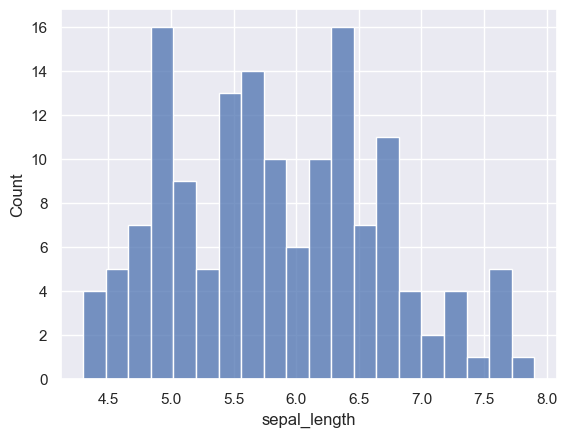

In [49]:
sns.histplot(iris['sepal_length'], bins = 20)
plt.show()

### 1.6.2 Box Plot

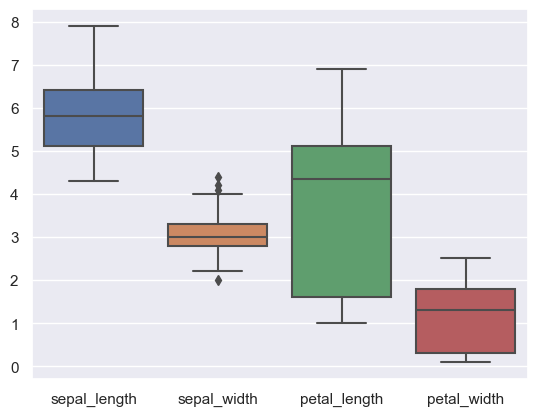

In [50]:
sns.boxplot(data = iris)
plt.show()

### 1.6.3 Density Plots

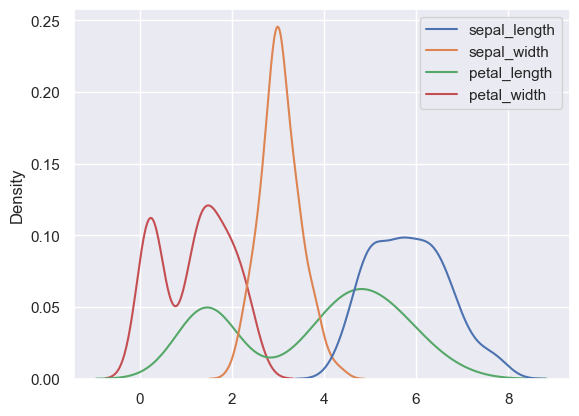

In [51]:
sns.kdeplot(iris)
plt.show()

### 1.6.4 Scatter Plots

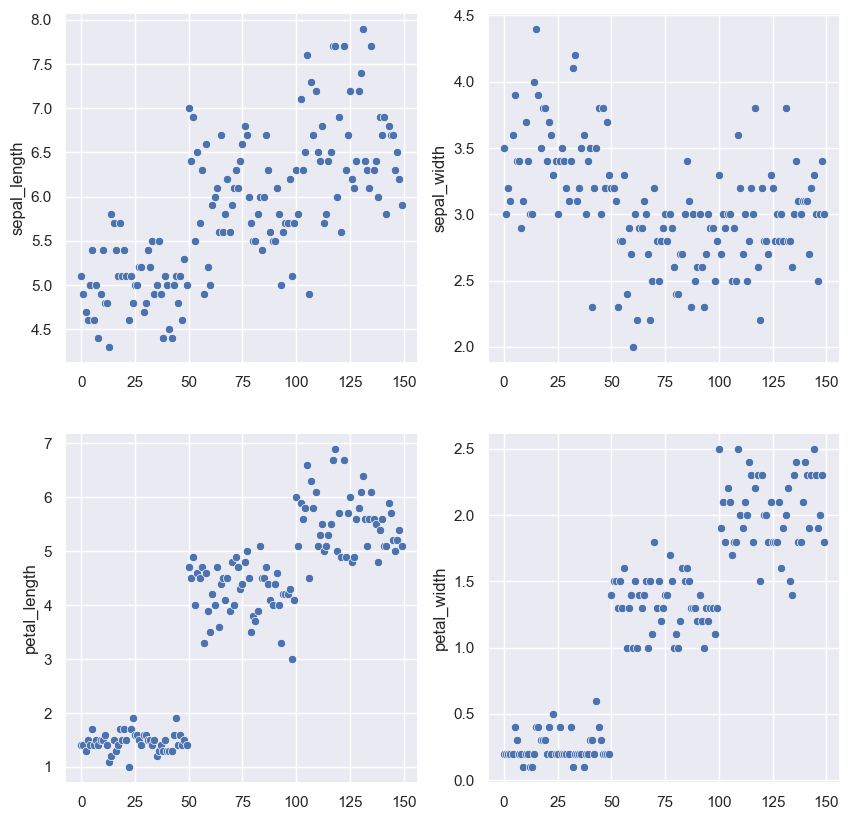

In [52]:
fig = plt.figure(figsize = (10,10))

gs = GridSpec(nrows = 2, ncols = 2, figure = fig)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

sns.scatterplot(iris['sepal_length'], ax=ax0)
sns.scatterplot(iris['sepal_width'], ax=ax1)
sns.scatterplot(iris['petal_length'], ax=ax2)
sns.scatterplot(iris['petal_width'], ax=ax3)

plt.show()

### 1.6.5 Violin Plot

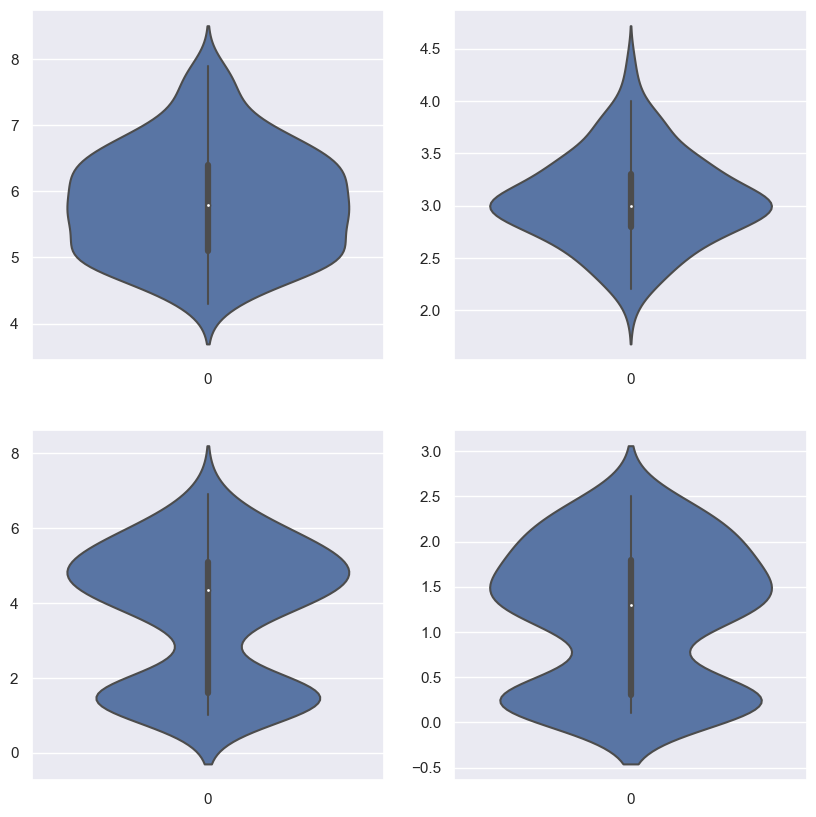

In [53]:
fig = plt.figure(figsize = (10,10))

gs = GridSpec(nrows = 2, ncols = 2, figure = fig)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

sns.violinplot(iris['sepal_length'], ax=ax0)
sns.violinplot(iris['sepal_width'], ax=ax1)
sns.violinplot(iris['petal_length'], ax=ax2)
sns.violinplot(iris['petal_width'], ax=ax3)

plt.show()

### 1.6.6 Contour plot

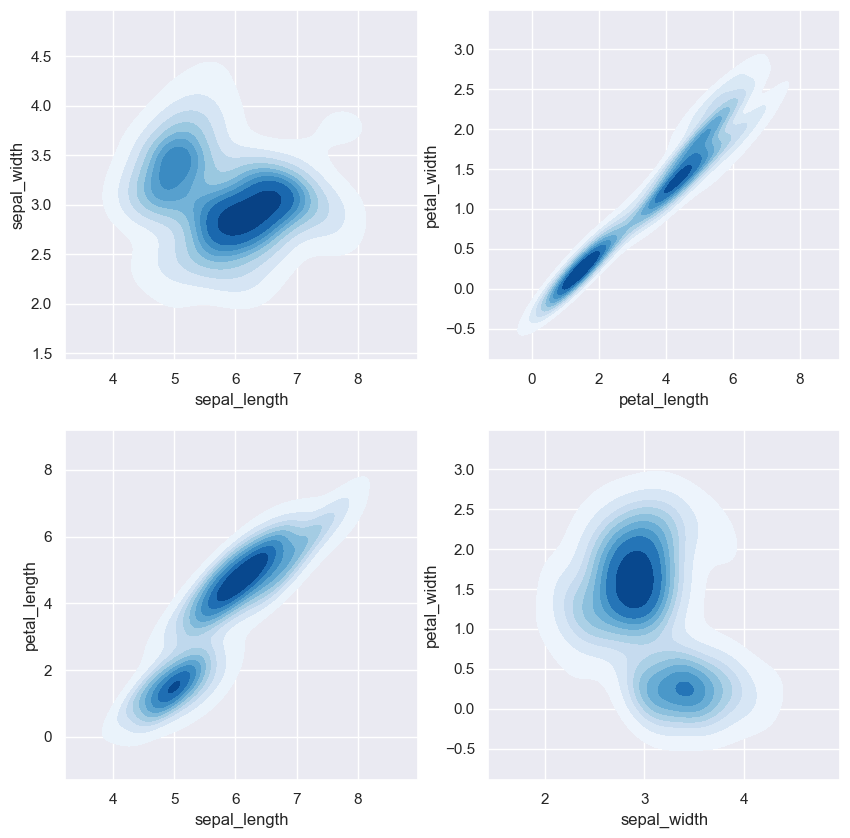

In [55]:
fig = plt.figure(figsize = (10,10))

gs = GridSpec(nrows = 2, ncols = 2, figure = fig)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

sns.kdeplot(x=iris.sepal_length, y=iris.sepal_width, cmap='Blues', fill=True, ax = ax0)
sns.kdeplot(x=iris.petal_length, y=iris.petal_width, cmap='Blues', fill=True, ax = ax1)
sns.kdeplot(x=iris.sepal_length, y=iris.petal_length, cmap='Blues', fill=True, ax = ax2)
sns.kdeplot(x=iris.sepal_width, y=iris.petal_width, cmap='Blues', fill=True, ax = ax3)

plt.show()

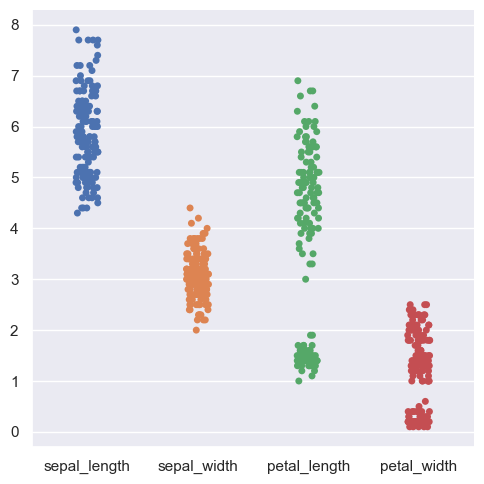

In [56]:
sns.catplot(iris)
plt.show()